In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\dipkh\Downloads\heart_disesase.csv")
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
data.shape

(297, 14)

In [4]:
data.size


4158

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [7]:
data['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

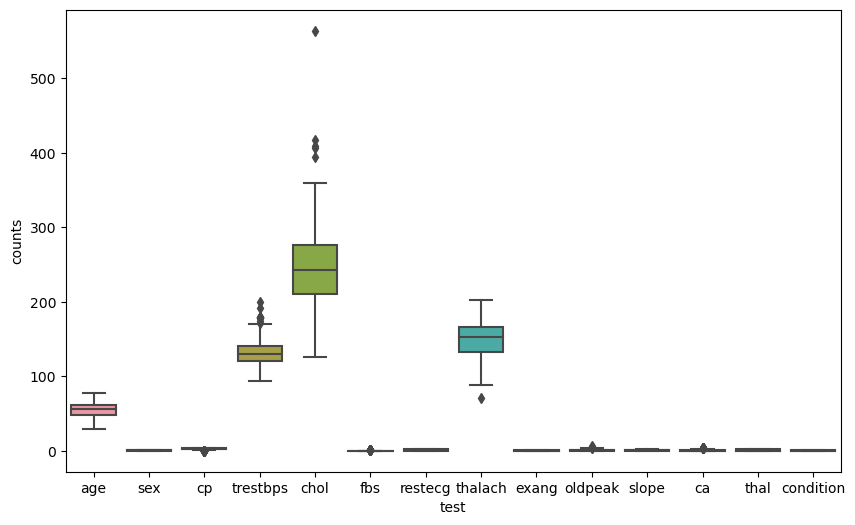

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.xlabel('test')
plt.ylabel('counts')
plt.show()

In [9]:
data[['trestbps','chol','thalach']]=data[['trestbps','chol','thalach']]
Q1 = data[['trestbps','chol','thalach']].quantile(0.25)
Q3 = data[['trestbps','chol','thalach']].quantile(0.75)
IQR = Q3-Q1
print(IQR)
#print(outlier)

trestbps    20.0
chol        65.0
thalach     33.0
dtype: float64


In [10]:
data[['trestbps','chol','thalach']]= np.clip(data[['trestbps','chol','thalach']], Q1-1.5*IQR, Q3+1.5*IQR,axis=1)

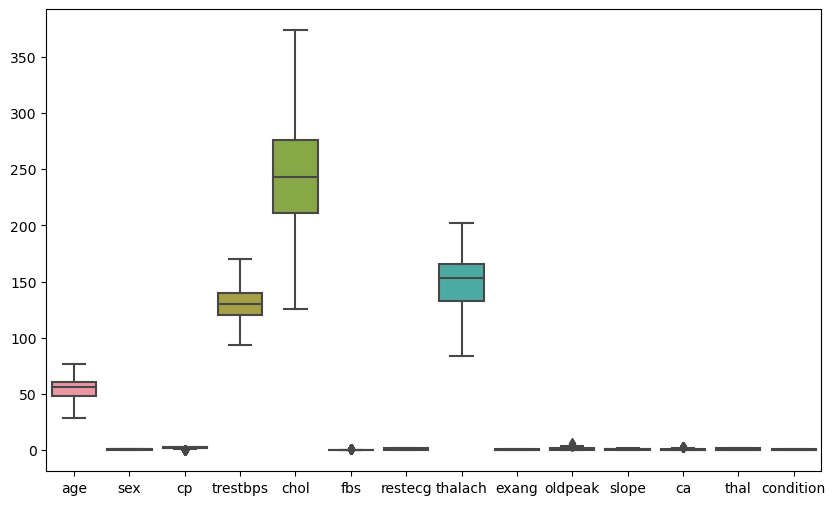

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.show()

In [22]:
data_type=data['sex'].value_counts()

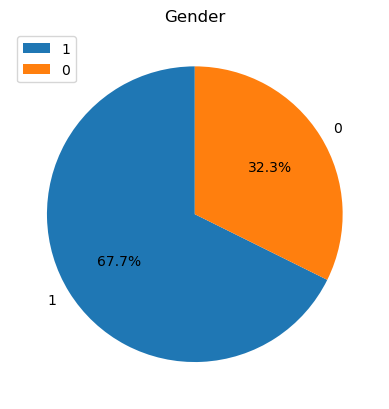

In [23]:
labels = data_type.index.tolist()
sizes = data_type.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Gender')
plt.legend(labels, loc='best')
plt.show()

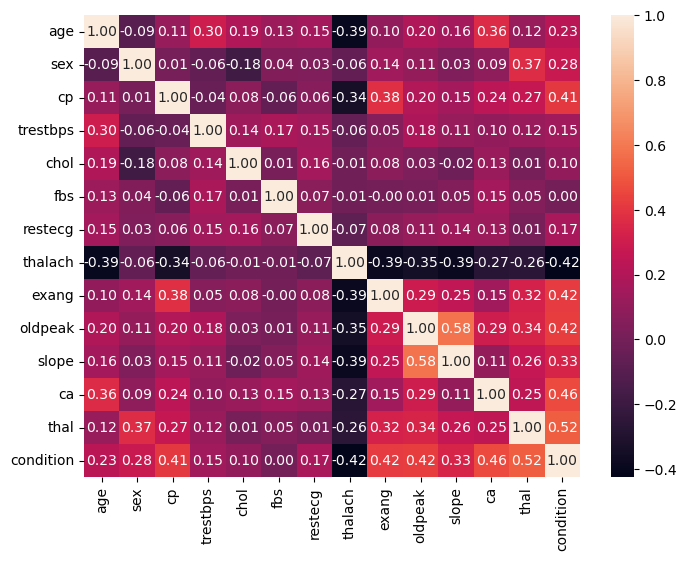

In [24]:
corr_mat = data.corr()
fig = plt.figure(figsize = (8,6))
sns.heatmap(corr_mat,annot=True,fmt='.2f')
plt.show()

In [26]:
var=data.columns

In [28]:
from scipy.stats import pearsonr
for col in var:
    coef, pval = pearsonr(data[col], data.condition)
    print('Correlation b/w condition and %s - coef: %.2f, pval: %f' %(col, coef, pval))

Correlation b/w condition and age - coef: 0.23, pval: 0.000079
Correlation b/w condition and sex - coef: 0.28, pval: 0.000001
Correlation b/w condition and cp - coef: 0.41, pval: 0.000000
Correlation b/w condition and trestbps - coef: 0.15, pval: 0.010778
Correlation b/w condition and chol - coef: 0.10, pval: 0.089799
Correlation b/w condition and fbs - coef: 0.00, pval: 0.956659
Correlation b/w condition and restecg - coef: 0.17, pval: 0.004044
Correlation b/w condition and thalach - coef: -0.42, pval: 0.000000
Correlation b/w condition and exang - coef: 0.42, pval: 0.000000
Correlation b/w condition and oldpeak - coef: 0.42, pval: 0.000000
Correlation b/w condition and slope - coef: 0.33, pval: 0.000000
Correlation b/w condition and ca - coef: 0.46, pval: 0.000000
Correlation b/w condition and thal - coef: 0.52, pval: 0.000000
Correlation b/w condition and condition - coef: 1.00, pval: 0.000000


In [29]:
X = data.drop(['condition'], axis=1)
y = data['condition']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y,test_size=0.25,random_state=5)
print("Shape of X_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test:  ",x_test.shape)
print("Shape of y_test:  ",y_test.shape)

Shape of X_train:  (222, 13)
Shape of y_train:  (222,)
Shape of X_test:   (75, 13)
Shape of y_test:   (75,)


In [30]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr =lr.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score

acc = accuracy_score(y_test,y_pred_lr)
prec = precision_score(y_test,y_pred_lr,average='weighted')
f1 = f1_score(y_test,y_pred_lr,average='micro')
recall = recall_score(y_test,y_pred_lr,average='weighted')
results = pd.DataFrame([['Logistic Regression ', acc,prec,f1,recall]],
                      columns = ['Model','Accuracy','Precision','F1_score','Recall'])
print(results)

                  Model  Accuracy  Precision  F1_score    Recall
0  Logistic Regression   0.813333   0.820947  0.813333  0.813333


In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt= dt.predict(x_test)

acc = accuracy_score(y_test,y_pred_dt)
prec = precision_score(y_test,y_pred_dt,average='weighted')
f1 = f1_score(y_test,y_pred_dt,average='micro')
recall = recall_score(y_test,y_pred_dt,average='weighted')
model_results = pd.DataFrame([['Decision Tree', acc,prec,f1,recall]],
                      columns = ['Model','Accuracy','Precision','F1_score','Recall'])
results=results.append(model_results,ignore_index=True)
print(results)

                  Model  Accuracy  Precision  F1_score    Recall
0  Logistic Regression   0.813333   0.820947  0.813333  0.813333
1         Decision Tree  0.720000   0.746154  0.720000  0.720000


In [33]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
acc = accuracy_score(y_test,y_pred_rf)
prec = precision_score(y_test,y_pred_rf,average='weighted')
f1 = f1_score(y_test,y_pred_rf,average='micro')
recall = recall_score(y_test,y_pred_rf,average='weighted')
model_results = pd.DataFrame([['Random Forest', acc,prec,f1,recall]],
                      columns = ['Model','Accuracy','Precision','F1_score','Recall'])
results=results.append(model_results,ignore_index=True)
print(results)

                  Model  Accuracy  Precision  F1_score    Recall
0  Logistic Regression   0.813333   0.820947  0.813333  0.813333
1         Decision Tree  0.720000   0.746154  0.720000  0.720000
2         Random Forest  0.813333   0.827350  0.813333  0.813333


In [34]:
dt_e = DecisionTreeClassifier(criterion ="entropy")
dt_e.fit(x_train,y_train)
y_pred_dt_e= dt_e.predict(x_test)

acc = accuracy_score(y_test,y_pred_dt_e)
prec = precision_score(y_test,y_pred_dt_e,average='weighted')
f1 = f1_score(y_test,y_pred_dt_e,average='micro')
recall = recall_score(y_test,y_pred_dt_e,average='weighted')
model_results = pd.DataFrame([['Decision Tree(Entropy) ', acc,prec,f1,recall]],
                      columns = ['Model','Accuracy','Precision','F1_score','Recall'])
results=results.append(model_results,ignore_index=True)
print(results)

                     Model  Accuracy  Precision  F1_score    Recall
0     Logistic Regression   0.813333   0.820947  0.813333  0.813333
1            Decision Tree  0.720000   0.746154  0.720000  0.720000
2            Random Forest  0.813333   0.827350  0.813333  0.813333
3  Decision Tree(Entropy)   0.666667   0.684922  0.666667  0.666667


In [35]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(x_train,y_train)
y_pred_svc= model_svc.predict(x_test)

acc = accuracy_score(y_test,y_pred_svc)
prec = precision_score(y_test,y_pred_svc,average='weighted')
f1 = f1_score(y_test,y_pred_svc,average='micro')
recall = recall_score(y_test,y_pred_svc,average='weighted')
model_results = pd.DataFrame([['Support Vector Classifier', acc,prec,f1,recall]],
                      columns = ['Model','Accuracy','Precision','F1_score','Recall'])
results=results.append(model_results,ignore_index=True)
print(results)

                       Model  Accuracy  Precision  F1_score    Recall
0       Logistic Regression   0.813333   0.820947  0.813333  0.813333
1              Decision Tree  0.720000   0.746154  0.720000  0.720000
2              Random Forest  0.813333   0.827350  0.813333  0.813333
3    Decision Tree(Entropy)   0.666667   0.684922  0.666667  0.666667
4  Support Vector Classifier  0.693333   0.688000  0.693333  0.693333


In [36]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(n_neighbors=5)
neighbor.fit(x_train,y_train)
y_pred_neighbor =neighbor.predict(x_test)

acc = accuracy_score(y_test,y_pred_neighbor)
prec = precision_score(y_test,y_pred_neighbor,average='weighted')
f1 = f1_score(y_test,y_pred_neighbor,average='micro')
recall = recall_score(y_test,y_pred_neighbor,average='weighted')
model_results = pd.DataFrame([['KNeighbors Classifier', acc,prec,f1,recall]],
                      columns = ['Model','Accuracy','Precision','F1_score','Recall'])
results=results.append(model_results,ignore_index=True)
print(results)

                       Model  Accuracy  Precision  F1_score    Recall
0       Logistic Regression   0.813333   0.820947  0.813333  0.813333
1              Decision Tree  0.720000   0.746154  0.720000  0.720000
2              Random Forest  0.813333   0.827350  0.813333  0.813333
3    Decision Tree(Entropy)   0.666667   0.684922  0.666667  0.666667
4  Support Vector Classifier  0.693333   0.688000  0.693333  0.693333
5      KNeighbors Classifier  0.640000   0.642082  0.640000  0.640000
